## 필요 라이브러리 호출
+ 텐서플로우 버전 확인하기

In [ ]:
import tensorflow as tf

import scipy

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

import numpy as np

In [ ]:
print(tf.__version__) # 텐서플로우 버전 확인

2.12.0


## 음식 이미지 준비

1. 구글 드라이브 마운트 : 구글 드라이브 내 foodList50.zip 다운로드 
2. 현재 디렉토리 내 필요없는 파일 제거 : sample_data 디렉토리 전체 제거
2. 음식 이미지 다운로드 : foodList50 디렉토리 내 50가지 분류가 정상 존재하는지 확인

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf "sample_data/" "foodList50/" # 파일 삭제하는 커맨드이므로 주의할 것!

In [ ]:
!unzip "/content/drive/MyDrive/AI_images/foodList50.zip"

In [ ]:
# foodList50 하위 디렉토리 확인
!ls -l ./foodList50 | grep ^d | wc -l # 하위 디텍토리 수 출력
# !ls -l ./foodList50 | grep ^d | awk '{print $NF}' # 하위 디렉토리 명 출력

50


## 분류 설정 확인 및 분류별 이미지 개수 확인

+ ImageDataGenerator를 활용한 자동 이미지 분류 설정
+ 분류별 이미지 개수 확인

In [ ]:
# 별도의 이미지 변경없이 그대로 가져옴
imgGen = ImageDataGenerator(rescale=1. / 255)

data_generator = imgGen.flow_from_directory(
    './foodList50',
    color_mode='rgb',
    shuffle=False, # debugging을 위해 False로
    target_size=(224, 224),
    batch_size=1000,
    class_mode='categorical')

Found 49999 images belonging to 50 classes.


In [ ]:
# ImageDataGenerator로 설정한 클래스 확인
foodList = list(data_generator.class_indices.keys())
print(foodList)

['고사리나물무침', '달걀국', '닭개장', '삼겹살구이', '소고기무국', '숙주나물무침', '시금치나물무침', '시래기된장국', '훈제오리', '갈비탕', '갈치구이', '감자조림', '감자탕', '건새우볶음', '고등어구이', '김치볶음밥', '김치찌개', '누룽지', '동태찌개', '된장찌개', '두부김치', '두부조림', '떡갈비', '떡볶이', '멸치볶음', '물냉면', '미역국', '북엇국', '비빔냉면', '비빔밥', '삼계탕', '새우볶음밥', '새우튀김', '소세지볶음', '순두부찌개', '알밥', '애호박볶음', '어묵볶음', '오징어튀김', '유부초밥', '육개장', '잡곡밥', '제육볶음', '주꾸미볶음', '짜장면', '짬뽕', '쫄면', '칼국수', '콩나물국', '황태구이']


## 분류별 이미지 test, validation, train으로 분리
+ test 이미지 : 100장
+ validation 이미지 : 150장
+ train 이미지 : 750장

In [ ]:
import os

import glob
from skimage.io import imread   # 이미지 불러오기

In [ ]:
!rm -rf kfood50_imageSet

In [ ]:
imgSet_path = 'kfood50_imageSet/'
sub_dir = ['test/', 'validation/', 'train/']

main_path = './foodList50/'
imgs_dict = {} # 분류별 이미지 경로를 딕셔너리로 저장

In [ ]:
# 이미지셋 저장을 위한 새로운 디렉토리 생성
os.mkdir(imgSet_path)
for sub in sub_dir :
    os.mkdir(imgSet_path + sub)

for sub in sub_dir :
    for food in foodList :
        os.mkdir(imgSet_path + sub + food + '/')

In [ ]:
for food in foodList :
    imgs = np.array([img for img in os.listdir(main_path + food) 
                        if not img.startswith('.') and img.startswith('Img_')])
    print(f'{food} : {imgs.shape}')
    imgs_dict[food] = np.sort(imgs)[:1000]
    
    print(f'{food} : {imgs_dict[food].shape}')
    print('---------------------------')

고사리나물무침 : (1000,)
고사리나물무침 : (1000,)
---------------------------
달걀국 : (1001,)
달걀국 : (1000,)
---------------------------
닭개장 : (1003,)
닭개장 : (1000,)
---------------------------
삼겹살구이 : (1000,)
삼겹살구이 : (1000,)
---------------------------
소고기무국 : (1000,)
소고기무국 : (1000,)
---------------------------
숙주나물무침 : (1000,)
숙주나물무침 : (1000,)
---------------------------
시금치나물무침 : (1000,)
시금치나물무침 : (1000,)
---------------------------
시래기된장국 : (1000,)
시래기된장국 : (1000,)
---------------------------
훈제오리 : (1001,)
훈제오리 : (1000,)
---------------------------
갈비탕 : (1000,)
갈비탕 : (1000,)
---------------------------
갈치구이 : (1000,)
갈치구이 : (1000,)
---------------------------
감자조림 : (1001,)
감자조림 : (1000,)
---------------------------
감자탕 : (1003,)
감자탕 : (1000,)
---------------------------
건새우볶음 : (1000,)
건새우볶음 : (1000,)
---------------------------
고등어구이 : (1000,)
고등어구이 : (1000,)
----

In [ ]:
for food, imgs in imgs_dict.items() :
    print(f'{food} : {imgs.shape}')
    print(imgs[:3])
    print(imgs[-3:]) 

고사리나물무침 : (1000,)
['Img_041_0000.JPG' 'Img_041_0001.JPG' 'Img_041_0002.JPG']
['Img_041_0997.jpg' 'Img_041_0998.jpg' 'Img_041_0999.jpg']
달걀국 : (1000,)
['Img_014_0000.jpg' 'Img_014_0001.jpg' 'Img_014_0002.jpg']
['Img_014_0997.jpg' 'Img_014_0998.jpg' 'Img_014_0999.jpg']
닭개장 : (1000,)
['Img_120_0000.JPG' 'Img_120_0001.JPG' 'Img_120_0002.jpg']
['Img_120_0997.jpg' 'Img_120_0998.jpg' 'Img_120_0999.jpg']
삼겹살구이 : (1000,)
['Img_008_0000.jpg' 'Img_008_0001.jpg' 'Img_008_0002.jpg']
['Img_008_0997.jpg' 'Img_008_0998.jpg' 'Img_008_0999.jpg']
소고기무국 : (1000,)
['Img_016_0000.jpg' 'Img_016_0001.jpg' 'Img_016_0002.jpg']
['Img_016_0997.jpg' 'Img_016_0998.jpg' 'Img_016_0999.jpg']
숙주나물무침 : (1000,)
['Img_043_0000.JPG' 'Img_043_0001.JPG' 'Img_043_0002.jpg']
['Img_043_0997.jpg' 'Img_043_0998.jpg' 'Img_043_0999.jpg']
시금치나물무침 : (1000,)
['Img_044_0000.JPG' 'Img_044_0001.JPG' 'Img_044_0002.JPG']
['Img_044_0997.jpg' 'Img_044_0998.jpg' 'Img_044_0999.jpg']
시래기되

In [ ]:
from PIL import Image

for food in foodList :
    foodImages = imgs_dict[food]
    
    print(f'{food} -----------')
    test = foodImages[:100] # test 100장
    print(f'test : {test.shape}')
    
    validation = foodImages[100:250] # validation : 150장
    print(f'validation : {validation.shape}')
    
    train = foodImages[250:] # train : 750장
    print(f'train : {train.shape}')

    for img in test :
        filename, _ = img.split('.')
        imgRGB = Image.open(main_path+food+'/'+img).convert('RGB')
        imgRGB.save(imgSet_path+sub_dir[0]+food+'/'+filename+'.jpg', 'jpeg')

    for img in validation :
        filename, _ = img.split('.')
        imgRGB = Image.open(main_path+food+'/'+img).convert('RGB')
        imgRGB.save(imgSet_path+sub_dir[1]+food+'/'+filename+'.jpg', 'jpeg')

    for img in train :
        filename, _ = img.split('.')
        imgRGB = Image.open(main_path+food+'/'+img).convert('RGB')
        imgRGB.save(imgSet_path+sub_dir[2]+food+'/'+filename+'.jpg', 'jpeg')



고사리나물무침 -----------
test : (100,)
validation : (150,)
train : (750,)
달걀국 -----------
test : (100,)
validation : (150,)
train : (750,)
닭개장 -----------
test : (100,)
validation : (150,)
train : (750,)
삼겹살구이 -----------
test : (100,)
validation : (150,)
train : (750,)
소고기무국 -----------
test : (100,)
validation : (150,)
train : (750,)
숙주나물무침 -----------
test : (100,)
validation : (150,)
train : (750,)
시금치나물무침 -----------
test : (100,)
validation : (150,)
train : (750,)
시래기된장국 -----------
test : (100,)
validation : (150,)
train : (750,)
훈제오리 -----------
test : (100,)
validation : (150,)
train : (750,)
갈비탕 -----------
test : (100,)
validation : (150,)
train : (750,)
갈치구이 -----------
test : (100,)
validation : (150,)
train : (750,)
감자조림 -----------
test : (100,)
validation : (150,)
train : (750,)
감자탕 -----------
test : (100,)
validation : (150,)
train : (750,)
건새우볶음 -----------
test : (100,)
validation : (150,)
train : (750,)


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


미역국 -----------
test : (100,)
validation : (150,)
train : (750,)
북엇국 -----------
test : (100,)
validation : (150,)
train : (750,)
비빔냉면 -----------
test : (100,)
validation : (150,)
train : (750,)
비빔밥 -----------
test : (100,)
validation : (150,)
train : (750,)
삼계탕 -----------
test : (100,)
validation : (150,)
train : (750,)
새우볶음밥 -----------
test : (100,)
validation : (150,)
train : (750,)
새우튀김 -----------
test : (100,)
validation : (150,)
train : (750,)
소세지볶음 -----------
test : (100,)
validation : (150,)
train : (750,)
순두부찌개 -----------
test : (100,)
validation : (150,)
train : (750,)
알밥 -----------
test : (100,)
validation : (150,)
train : (750,)
애호박볶음 -----------
test : (100,)
validation : (150,)
train : (750,)
어묵볶음 -----------
test : (100,)
validation : (150,)
train : (750,)
오징어튀김 -----------
test : (100,)
validation : (150,)
train : (750,)
유부초밥 -----------
test : (100,)
validation : (150,)
train : (750,)
육개장 -----------
test : (100,)
validation : (150,)
train : (750,)
잡곡밥 --------

In [ ]:
# kfood50_imageSet 디렉토리 내 test, validation, train 개수 확인
!find ./kfood50_imageSet/test/ -type f -name "*.jpg" | wc -l
!find ./kfood50_imageSet/validation/ -type f -name "*.jpg" | wc -l
!find ./kfood50_imageSet/train/ -type f -name "*.jpg" | wc -l

5000
7500
37500


## 생성한 이미지셋 압축 및 내보내기

In [ ]:
!zip -r kfood50_imageSet.zip kfood50_imageSet/

In [ ]:
# 구글 드라이브에 이미지셋 저장
!cp kfood50_imageSet.zip /content/drive/MyDrive/AI_images/kfood50_imageSet.zip

## ImageDataGenerator로 생성한 배열 shape 확인 및 분류별 이미지 개수 확인

In [ ]:
imgSet_path = 'kfood50_imageSet/'
train_path = imgSet_path + 'train/'
validation_path = imgSet_path + 'validation/'
test_path = imgSet_path + 'test/'

img_height = 224
img_width = 224
batch_size_train = 750
batch_size_validation = 150
batch_size_test = 100

In [ ]:
print(foodList)
print(len(foodList))

['고사리나물무침', '달걀국', '닭개장', '삼겹살구이', '소고기무국', '숙주나물무침', '시금치나물무침', '시래기된장국', '훈제오리', '갈비탕', '갈치구이', '감자조림', '감자탕', '건새우볶음', '고등어구이', '김치볶음밥', '김치찌개', '누룽지', '동태찌개', '된장찌개', '두부김치', '두부조림', '떡갈비', '떡볶이', '멸치볶음', '물냉면', '미역국', '북엇국', '비빔냉면', '비빔밥', '삼계탕', '새우볶음밥', '새우튀김', '소세지볶음', '순두부찌개', '알밥', '애호박볶음', '어묵볶음', '오징어튀김', '유부초밥', '육개장', '잡곡밥', '제육볶음', '주꾸미볶음', '짜장면', '짬뽕', '쫄면', '칼국수', '콩나물국', '황태구이']
50


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train_path,
    shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size_train,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size_validation,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size_test,
    class_mode='categorical')

Found 37500 images belonging to 50 classes.
Found 7500 images belonging to 50 classes.
Found 5000 images belonging to 50 classes.


In [ ]:
count_train = np.zeros(shape=(50,)) # 분류별 이미지 수 확인을 위함
count_validation = np.zeros(shape=(50,)) # 분류별 이미지 수 확인을 위함
count_test = np.zeros(shape=(50,)) # 분류별 이미지 수 확인을 위함

for i in range(50) :
    x1,y1 = train_generator.next()
    x2,y2 = validation_generator.next()
    x3,y3 = test_generator.next()
    
    print(f'{i}: {x1.shape} {y1.shape}')
    print(f'{i}: {x2.shape} {y2.shape}')
    print(f'{i}: {x3.shape} {y3.shape}')

    count_train += y1.sum(axis=0)
    count_validation += y2.sum(axis=0)
    count_test += y3.sum(axis=0)

0: (750, 224, 224, 3) (750, 50)
0: (150, 224, 224, 3) (150, 50)
0: (100, 224, 224, 3) (100, 50)
1: (750, 224, 224, 3) (750, 50)
1: (150, 224, 224, 3) (150, 50)
1: (100, 224, 224, 3) (100, 50)
2: (750, 224, 224, 3) (750, 50)
2: (150, 224, 224, 3) (150, 50)
2: (100, 224, 224, 3) (100, 50)
3: (750, 224, 224, 3) (750, 50)
3: (150, 224, 224, 3) (150, 50)
3: (100, 224, 224, 3) (100, 50)
4: (750, 224, 224, 3) (750, 50)
4: (150, 224, 224, 3) (150, 50)
4: (100, 224, 224, 3) (100, 50)
5: (750, 224, 224, 3) (750, 50)
5: (150, 224, 224, 3) (150, 50)
5: (100, 224, 224, 3) (100, 50)
6: (750, 224, 224, 3) (750, 50)
6: (150, 224, 224, 3) (150, 50)
6: (100, 224, 224, 3) (100, 50)
7: (750, 224, 224, 3) (750, 50)
7: (150, 224, 224, 3) (150, 50)
7: (100, 224, 224, 3) (100, 50)
8: (750, 224, 224, 3) (750, 50)
8: (150, 224, 224, 3) (150, 50)
8: (100, 224, 224, 3) (100, 50)
9: (750, 224, 224, 3) (750, 50)
9: (150, 224, 224, 3) (150, 50)
9: (100, 224, 224, 3) (100, 50)
10: (750, 224, 224, 3) (750, 50)
10: (15

In [ ]:
# class별 이미지 개수 확인
print('train --------------------')
print(count_train)
print('validation --------------------')
print(count_validation)
print('test --------------------')
print(count_test)

train --------------------
[750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750.
 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750.
 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750. 750.
 750. 750. 750. 750. 750. 750. 750. 750.]
validation --------------------
[150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150.
 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150.
 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150.
 150. 150. 150. 150. 150. 150. 150. 150.]
test --------------------
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100.]


In [ ]:
# 구글 드라이브에 정상 업로드 되었는지 확인 
!rm -rf kfood50_imageSet/ kfood50_imageSet.zip
!unzip "/content/drive/MyDrive/AI_images/kfood50_imageSet.zip"

# kfood50_imageSet 디렉토리 내 test, validation, train 개수 확인
!find ./kfood50_imageSet/test/ -type f -name "*.jpg" | wc -l
!find ./kfood50_imageSet/validation/ -type f -name "*.jpg" | wc -l
!find ./kfood50_imageSet/train/ -type f -name "*.jpg" | wc -l

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0060.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0022.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0098.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0034.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0067.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0011.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0057.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0008.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0079.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0076.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0025.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0010.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0016.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0070.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0020.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0019.jpg  
  inflating: kfood50

## ImageDataGenerator으로 인식되는 분류별 이미지 개수 확인 
+ 위의 이미지 전처리 과정 전 데이터 확인을 위해 수행함

In [ ]:
countAll = np.zeros(shape=(50,)) # 분류별 이미지 수 확인을 위함

for i in range(50) :
    countList = np.zeros(shape=(50,))
    x,y = data_generator.next()
    print(f'{i}: {x.shape} {y.shape}')
    for i in range(len(y)) :
        countList += y[i]
    countAll += countList

0: (1000, 224, 224, 3) (1000, 50)
1: (1000, 224, 224, 3) (1000, 50)
2: (1000, 224, 224, 3) (1000, 50)
3: (1000, 224, 224, 3) (1000, 50)
4: (1000, 224, 224, 3) (1000, 50)
5: (1000, 224, 224, 3) (1000, 50)
6: (1000, 224, 224, 3) (1000, 50)
7: (1000, 224, 224, 3) (1000, 50)
8: (1000, 224, 224, 3) (1000, 50)
9: (1000, 224, 224, 3) (1000, 50)
10: (1000, 224, 224, 3) (1000, 50)
11: (1000, 224, 224, 3) (1000, 50)
12: (1000, 224, 224, 3) (1000, 50)
13: (1000, 224, 224, 3) (1000, 50)
14: (1000, 224, 224, 3) (1000, 50)
15: (1000, 224, 224, 3) (1000, 50)
16: (1000, 224, 224, 3) (1000, 50)
17: (1000, 224, 224, 3) (1000, 50)
18: (1000, 224, 224, 3) (1000, 50)
19: (1000, 224, 224, 3) (1000, 50)
20: (1000, 224, 224, 3) (1000, 50)
21: (1000, 224, 224, 3) (1000, 50)
22: (1000, 224, 224, 3) (1000, 50)
23: (1000, 224, 224, 3) (1000, 50)
24: (1000, 224, 224, 3) (1000, 50)


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25: (1000, 224, 224, 3) (1000, 50)
26: (1000, 224, 224, 3) (1000, 50)
27: (1000, 224, 224, 3) (1000, 50)
28: (1000, 224, 224, 3) (1000, 50)
29: (1000, 224, 224, 3) (1000, 50)
30: (1000, 224, 224, 3) (1000, 50)
31: (1000, 224, 224, 3) (1000, 50)
32: (1000, 224, 224, 3) (1000, 50)
33: (1000, 224, 224, 3) (1000, 50)
34: (1000, 224, 224, 3) (1000, 50)
35: (1000, 224, 224, 3) (1000, 50)
36: (1000, 224, 224, 3) (1000, 50)
37: (1000, 224, 224, 3) (1000, 50)
38: (1000, 224, 224, 3) (1000, 50)
39: (1000, 224, 224, 3) (1000, 50)
40: (1000, 224, 224, 3) (1000, 50)
41: (1000, 224, 224, 3) (1000, 50)
42: (1000, 224, 224, 3) (1000, 50)
43: (1000, 224, 224, 3) (1000, 50)
44: (1000, 224, 224, 3) (1000, 50)
45: (1000, 224, 224, 3) (1000, 50)
46: (1000, 224, 224, 3) (1000, 50)
47: (1000, 224, 224, 3) (1000, 50)
48: (1000, 224, 224, 3) (1000, 50)
49: (999, 224, 224, 3) (999, 50)


In [ ]:
# class별 이미지 개수 확인
print(countAll)

[1000. 1001. 1003.  994. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1001.
 1003. 1000. 1000.  999. 1002. 1000. 1000.  999. 1000. 1000. 1000.  996.
  999.  994.  999. 1000. 1003.  996. 1003. 1000. 1003. 1003. 1000. 1000.
 1000. 1001. 1002. 1000. 1000. 1000.  998. 1002.  998. 1000. 1000. 1000.
 1000. 1000.]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf sample_data/
!unzip "/content/drive/MyDrive/AI_images/kfood50_imageSet.zip"

In [ ]:
import tensorflow as tf

import scipy

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Visualize Image
def plot_images(nRow,nCol,img):
    fig = plt.figure()
    fig,ax = plt.subplots(nRow,nCol,figsize=(nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i,j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

In [ ]:
imgSet_path = 'kfood50_imageSet/'
train_path = imgSet_path + 'train/'
validation_path = imgSet_path + 'validation/'
test_path = imgSet_path + 'test/'

img_height = 224
img_width = 224
batch_size_train = 750
batch_size_validation = 150
batch_size_test = 100

In [ ]:
train_generator = datagen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train_path,
    # shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size_train,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    # shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size_validation,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    # shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size_test,
    class_mode='categorical')

Found 37500 images belonging to 50 classes.
Found 7500 images belonging to 50 classes.
Found 5000 images belonging to 50 classes.


In [ ]:
train_imgs, train_labels = train_generator[0]
print('train :', train_imgs.shape, train_labels.shape)

validation_imgs, validation_labels = validation_generator[0]
print('validation :', validation_imgs.shape, validation_labels.shape)

test_imgs, test_labels = test_generator[0]
print('test :', test_imgs.shape, test_labels.shape)

train : (750, 224, 224, 3) (750, 50)
validation : (150, 224, 224, 3) (150, 50)
test : (100, 224, 224, 3) (100, 50)


In [ ]:
class_list = list(train_generator.class_indices.keys())

train -----------------
['고등어구이', '떡볶이', '소세지볶음', '달걀국', '육개장', '어묵볶음', '소고기무국', '소고기무국']


<Figure size 640x480 with 0 Axes>

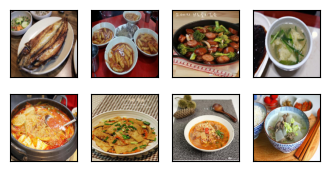

In [ ]:
print('train -----------------')
plot_images(2,4,train_imgs[:8])
train_labels = train_labels[:8].argmax(1)
print([class_list[idx] for idx in train_labels])

validation -----------------
['오징어튀김', '동태찌개', '쫄면', '오징어튀김', '닭개장', '닭개장', '숙주나물무침', '건새우볶음']


<Figure size 640x480 with 0 Axes>

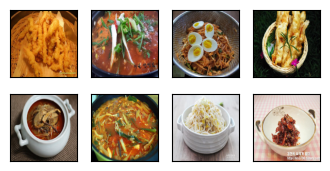

In [ ]:
print('validation -----------------')
plot_images(2,4,validation_imgs[:8])
validation_labels = validation_labels[:8].argmax(1)
print([class_list[idx] for idx in validation_labels])

test -----------------
['김치볶음밥', '오징어튀김', '알밥', '감자조림', '황태구이', '쫄면', '삼계탕', '떡갈비']


<Figure size 640x480 with 0 Axes>

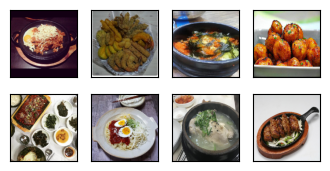

In [ ]:
print('test -----------------')
plot_images(2,4,test_imgs[:8])
test_labels = test_labels[:8].argmax(1)
print([class_list[idx] for idx in test_labels])


In [ ]:
train_generator.class_indices

{'고사리나물무침': 0,
 '달걀국': 1,
 '닭개장': 2,
 '삼겹살구이': 3,
 '소고기무국': 4,
 '숙주나물무침': 5,
 '시금치나물무침': 6,
 '시래기된장국': 7,
 '훈제오리': 8,
 '갈비탕': 9,
 '갈치구이': 10,
 '감자조림': 11,
 '감자탕': 12,
 '건새우볶음': 13,
 '고등어구이': 14,
 '김치볶음밥': 15,
 '김치찌개': 16,
 '누룽지': 17,
 '동태찌개': 18,
 '된장찌개': 19,
 '두부김치': 20,
 '두부조림': 21,
 '떡갈비': 22,
 '떡볶이': 23,
 '멸치볶음': 24,
 '물냉면': 25,
 '미역국': 26,
 '북엇국': 27,
 '비빔냉면': 28,
 '비빔밥': 29,
 '삼계탕': 30,
 '새우볶음밥': 31,
 '새우튀김': 32,
 '소세지볶음': 33,
 '순두부찌개': 34,
 '알밥': 35,
 '애호박볶음': 36,
 '어묵볶음': 37,
 '오징어튀김': 38,
 '유부초밥': 39,
 '육개장': 40,
 '잡곡밥': 41,
 '제육볶음': 42,
 '주꾸미볶음': 43,
 '짜장면': 44,
 '짬뽕': 45,
 '쫄면': 46,
 '칼국수': 47,
 '콩나물국': 48,
 '황태구이': 49}